In [1]:
import numpy as np
from qiskit import QuantumCircuit

# Valor esperado de 1 qubit

In [2]:
circuit = QuantumCircuit(1)

circuit.initialize([np.sqrt(0.7), +1j*np.sqrt(0.3)],0)

In [3]:
from qiskit.quantum_info import Pauli

In [4]:
Z = Pauli('Z')
X = Pauli('X')
Y = Pauli('Y')

In [5]:
from qiskit_aer.primitives import Estimator

In [6]:
estimator = Estimator()

In [7]:
job = estimator.run([circuit]*3, [X,Y,Z], shots=30000)

In [8]:
job.result().values

array([-0.00486667,  0.91693333,  0.40266667])

# Valor Esperado Estado de Bell

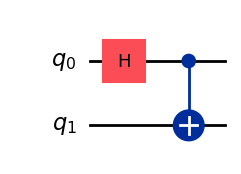

In [9]:
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0,1)
qc.draw("mpl")

In [10]:
from qiskit.quantum_info import SparsePauliOp

In [11]:
ZZ = SparsePauliOp('ZZ')
ZI = SparsePauliOp('ZI')
IZ = SparsePauliOp('IZ')
XX = SparsePauliOp('XX')
XI = SparsePauliOp('XI')
IX = SparsePauliOp('IX')

In [12]:
observas = [ZZ,ZI,IZ,XX,XI,IX]

In [13]:
job = estimator.run([qc]*len(observas), observas, shots=30000)

In [14]:
job.result().values

array([ 1.        , -0.00586667, -0.00586667,  1.        , -0.00206667,
       -0.00206667])

In [15]:
import matplotlib.pyplot as plt

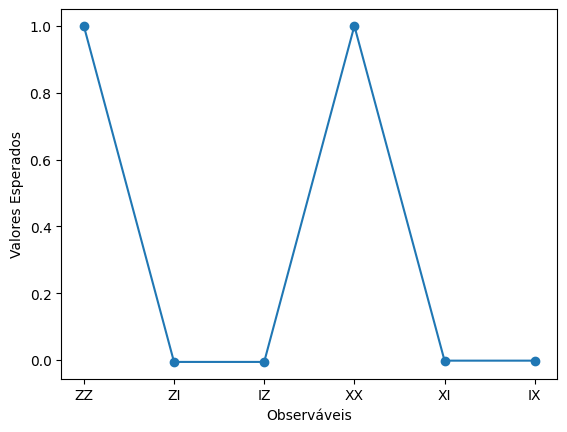

In [16]:
data = ["ZZ","ZI","IZ","XX","XI","IX"]
plt.plot(data, job.result().values, '-o')
plt.xlabel("Observáveis")
plt.ylabel("Valores Esperados")
plt.show()